7


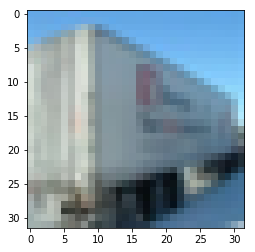

In [1]:
%matplotlib inline
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn import metrics
from tensorflow.contrib import learn

datadir='data/cifar-10-batches-bin/'

plt.ion()
G = glob.glob (datadir + '*.bin')
A = np.fromfile(G[0],dtype=np.uint8).reshape([10000,3073])
labels = A [:,0]
images = A [:,1:].reshape([10000,3,32,32]).transpose (0,2,3,1)
plt.imshow(images[15])
print (labels[11])
images_unroll = A [:,1:]


In [2]:
def max_pool_2x2(tensor_in):
	return tf.nn.max_pool(tensor_in,  ksize= [1,2,2,1], strides= [1,2,2,1], padding='SAME')

def conv_model (X, y):
    X= tf. reshape(X, [-1, 32, 32, 3])
    with tf.variable_scope('conv_layer1'):
        h_conv1=tf.contrib.layers.conv2d(X, num_outputs=16,  kernel_size=[5,5],  activation_fn=tf.nn.relu)#print (h_conv1)
        h_pool1=max_pool_2x2(h_conv1)#print (h_pool1)
    with tf.variable_scope('conv_layer2'):
        h_conv2=tf.contrib.layers.conv2d(h_pool1, num_outputs=16, kernel_size=[5,5], activation_fn=tf.nn.relu)
    #print (h_conv2)
    h_pool2=max_pool_2x2(h_conv2)
    h_pool2_flat = tf.reshape(h_pool2,  [-1,8*8*16 ])
    h_fc1 = tf.contrib.layers.stack(h_pool2_flat, tf.contrib.layers.fully_connected ,[96,48], activation_fn=tf.nn.relu )
    return skflow.models.logistic_regression(h_fc1,y)

images = np.array(images,dtype=np.float32)
classifier = skflow.TensorFlowEstimator(model_fn=conv_model, n_classes=10, batch_size=100, steps=2000, learning_rate=0.01)

%time classifier.fit(images, labels, logdir='/tmp/cnn_train/')
%time score =metrics.accuracy_score(labels, classifier.predict(images))
print ('Accuracy: {0:f}'.format(score))

#Examining fitted weights
#First 'onvolutional Layer
print ('1st Convolutional Layer weights and Bias')
#print (classifier.get_tensor_value('conv_layer1/convolution/filters:0'))
#print (classifier.get_tensor_value('conv_layer1/convolution/filters:1'))
       

AttributeError: module 'tensorflow.contrib.learn' has no attribute 'TensorFlowEstimator'